#### 1. Importing Libraries

In [1]:
#Importing Different Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

#To train regressors with the multioutput based training (which aren't inherently multioutput)
from sklearn.multioutput import MultiOutputRegressor

#Test Train Split Function
from sklearn.model_selection import train_test_split

#Model scoring functions and saving models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pickle

#Helper Libraries
import json
import pandas as pd
import numpy as np
import operator
import heapq

#To plot graphs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#### 2. Loading Label Indices

In [2]:
race_index = {}
with open("../Data/CorrelationData/race_label_dict.json") as f:
    race_index = json.load(f)

inv_race_index = {v: k for k, v in race_index.items()} 
    
emotion_index = {}
with open("../Data/CorrelationData/emotion_label_dict.json") as f:
    emotion_index = json.load(f)

inv_emotion_index = {v: k for k, v in emotion_index.items()}

comment_index = {}
with open("../Data/CorrelationData/comment_label_dict.json") as f:
    comment_index = json.load(f)

inv_comment_index = {v: k for k, v in comment_index.items()}

clothing_index = {}
with open("../Data/CorrelationData/clothing_label_dict.json") as f:
    clothing_index = json.load(f)

inv_clothing_index = {v: k for k, v in clothing_index.items()}

#### 3. Loading the dataset

In [3]:
data = []
with open("../Data/CorrelationData/data.json") as f:
    data = json.load(f)

In [4]:
#Flattening the clothing feature values to make X values as a 1D vector
for value in data:
    x_val_flat = value['x'][:-1]
    x_val_flat.extend(value['x'][4])
    value['x'] = x_val_flat

In [5]:
#Converting the data to a Pandas Dataframe and creating a numpy 2D array of X (Image Features) and Y (Comment labels) values
data_df = pd.DataFrame(data)
X = []
Y = []

for index,row in data_df.iterrows():
    X.append(row['x'])
    Y.append(row['y'])

X = np.array(X)
Y = np.array(Y)

#### 4. Studying the Data

##### 4.1 Number of posts for which a certain Sexist Type of Comment is observed

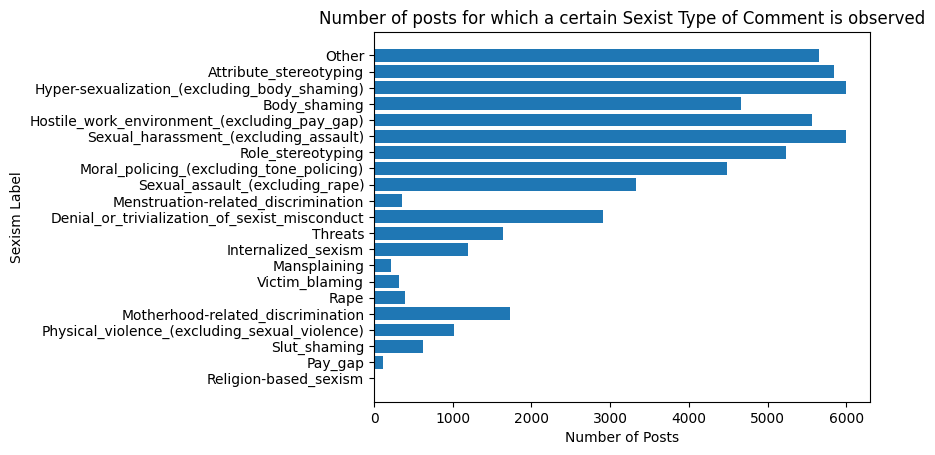

In [6]:
plt.rcdefaults()
fig, ax = plt.subplots()

comment_freq = {}
for label in inv_comment_index.keys():
    comment_freq[label] = 0
for y in Y:
    for index in range(0,len(y)):
        if y[index] > 0:
            comment_freq[index] += 1

ax.barh(list(comment_freq.keys()),list(comment_freq.values()), align='center')
ax.set_yticks(list(comment_freq.keys()))
ax.set_yticklabels([x.replace('__label__', '') for x in comment_index.keys()])
ax.invert_yaxis()
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Sexism Label')
ax.set_title('Number of posts for which a certain Sexist Type of Comment is observed')
plt.show()

##### 4.2 Number of posts for which a certain Race class is observed

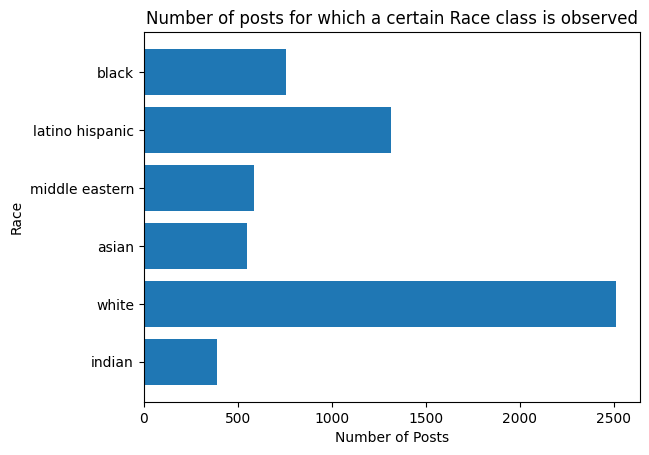

In [7]:
plt.rcdefaults()
fig, ax = plt.subplots()

race_freq = {}
for label in inv_race_index.keys():
    race_freq[label] = 0
for x in X:
    race_freq[x[1]] += 1

ax.barh(list(race_freq.keys()),list(race_freq.values()), align='center')
ax.set_yticks(list(race_freq.keys()))
ax.set_yticklabels(list(race_index.keys()))
ax.invert_yaxis()
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Race')
ax.set_title('Number of posts for which a certain Race class is observed')
plt.show()

##### 4.3 Number of posts for which a certain Emotion class is observed

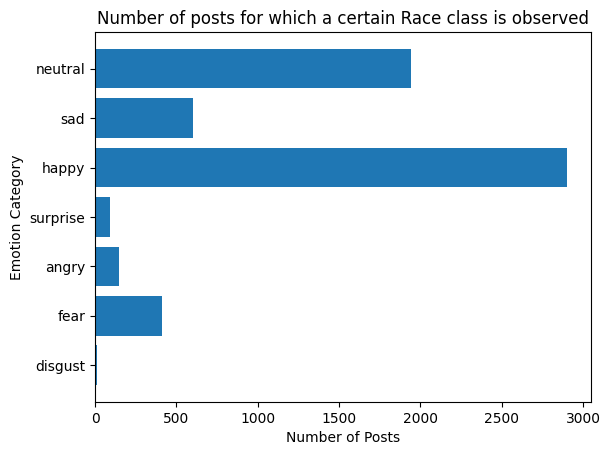

In [8]:
plt.rcdefaults()
fig, ax = plt.subplots()

emotion_freq = {}
for label in inv_emotion_index.keys():
    emotion_freq[label] = 0
for x in X:
    emotion_freq[x[2]] += 1

ax.barh(list(emotion_freq.keys()),list(emotion_freq.values()), align='center')
ax.set_yticks(list(emotion_freq.keys()))
ax.set_yticklabels(list(emotion_index.keys()))
ax.invert_yaxis()
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Emotion Category')
ax.set_title('Number of posts for which a certain Race class is observed')
plt.show()

##### 4.4 Number of posts for which a certain BMI class is observed

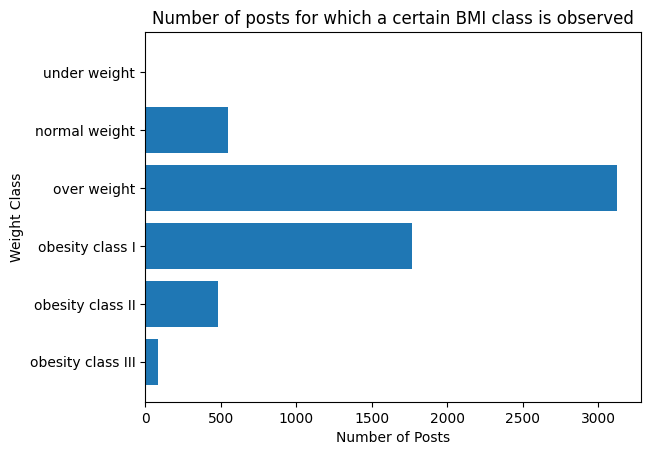

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots()

bmi_freq = {'under weight':0,
           'normal weight':0,
           'over weight':0,
           'obesity class I':0,
           'obesity class II':0,
           'obesity class III':0
           }

for x in X:
    if x[3] < 18.5:
        bmi_freq['under weight'] += 1
    elif x[3] >= 18.5 and x[3] <= 24.9:
        bmi_freq['normal weight'] += 1
    elif x[3] >= 25.0 and x[3] <= 29.9:
        bmi_freq['over weight'] += 1
    elif x[3] >= 30.0 and x[3] <= 34.9:
        bmi_freq['obesity class I'] += 1
    elif x[3] >= 35.0 and x[3] <= 39.9:
        bmi_freq['obesity class II'] += 1
    elif x[3] > 40:
        bmi_freq['obesity class III'] += 1
        
ax.barh(list(bmi_freq.keys()),list(bmi_freq.values()), align='center')
ax.set_yticks(list(bmi_freq.keys()))
ax.set_yticklabels(list(bmi_freq.keys()))
ax.invert_yaxis()
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Weight Class')
ax.set_title('Number of posts for which a certain BMI class is observed')
plt.show()

##### 4.5 Number of posts for which a Age Category is observed

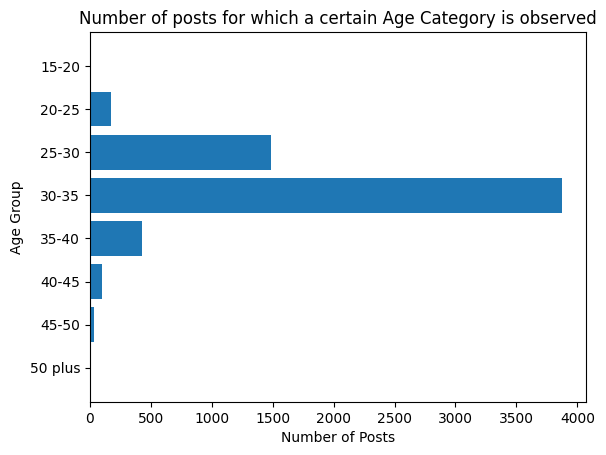

In [10]:
plt.rcdefaults()
fig, ax = plt.subplots()

age_freq = {'15-20':0,
           '20-25':0,
           '25-30':0,
           '30-35':0,
           '35-40':0,
           '40-45':0,
           '45-50':0,
           '50 plus':0
           }

for x in X:
    if x[0] < 20:
        age_freq['15-20'] += 1
    elif x[0] >= 20 and x[0] < 25:
        age_freq['20-25'] += 1
    elif x[0] >= 25 and x[0] < 30:
        age_freq['25-30'] += 1
    elif x[0] >= 30 and x[0] < 35:
        age_freq['30-35'] += 1
    elif x[0] >= 35 and x[0] < 40:
        age_freq['35-40'] += 1
    elif x[0] >= 40 and x[0] < 45:
        age_freq['40-45'] += 1
    elif x[0] >= 45 and x[0] < 50:
        age_freq['45-50'] += 1
    elif x[0] > 50:
        age_freq['50 plus'] += 1
        
        
ax.barh(list(age_freq.keys()),list(age_freq.values()), align='center')
ax.set_yticks(list(age_freq.keys()))
ax.set_yticklabels(list(age_freq.keys()))
ax.invert_yaxis()
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Age Group')
ax.set_title('Number of posts for which a certain Age Category is observed')
plt.show()

##### 4.6 Number of posts for which a certain Clothing Category is observed

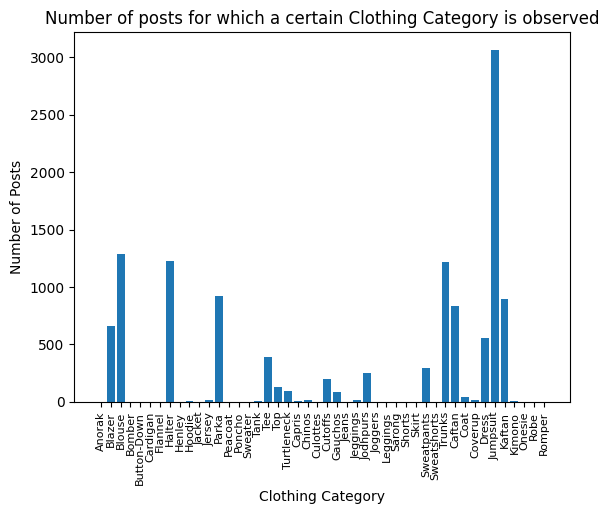

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()

clothing_freq = {}
for label in inv_clothing_index.keys():
    clothing_freq[label] = 0
for x in X:
    clothing_freq[x[4]] += 1
    clothing_freq[x[5]] += 1

ax.bar(list(clothing_freq.keys()),list(clothing_freq.values()), align='center')
ax.set_xticks(list(clothing_freq.keys()))
ax.set_xticklabels(list(clothing_index.keys()), fontsize=8, rotation="vertical")
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Clothing Category')
ax.set_title('Number of posts for which a certain Clothing Category is observed')
plt.show()

##### 4.7 Correlating Race Labels and Sexism Categories based on observed frequencies

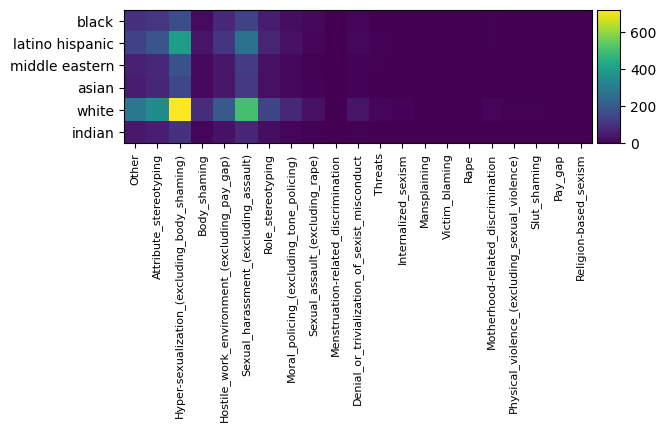

In [12]:
freq_corr_race = []
for race_label in inv_race_index:
    freq_corr_race.append(np.zeros(len(inv_comment_index)))

for index in range(0,len(Y)):
    y_vals = Y[index]
    for val_index in range(0,len(y_vals)):
        if y_vals[val_index] > 0:
            freq_corr_race[int(X[index][1])][val_index] += y_vals[val_index]
            
plt.figure()
ax = plt.gca()
im = ax.imshow(freq_corr_race, cmap='viridis', interpolation='nearest')
plt.yticks(range(0,len(race_index)), list(race_index.keys()))
plt.xticks(range(0,len(comment_index)), [x.replace('__label__', '') for x in comment_index.keys()], rotation=90, fontsize=8)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

##### 4.8 Correlating Clothing Classes and Sexism Categories based on observed frequencies

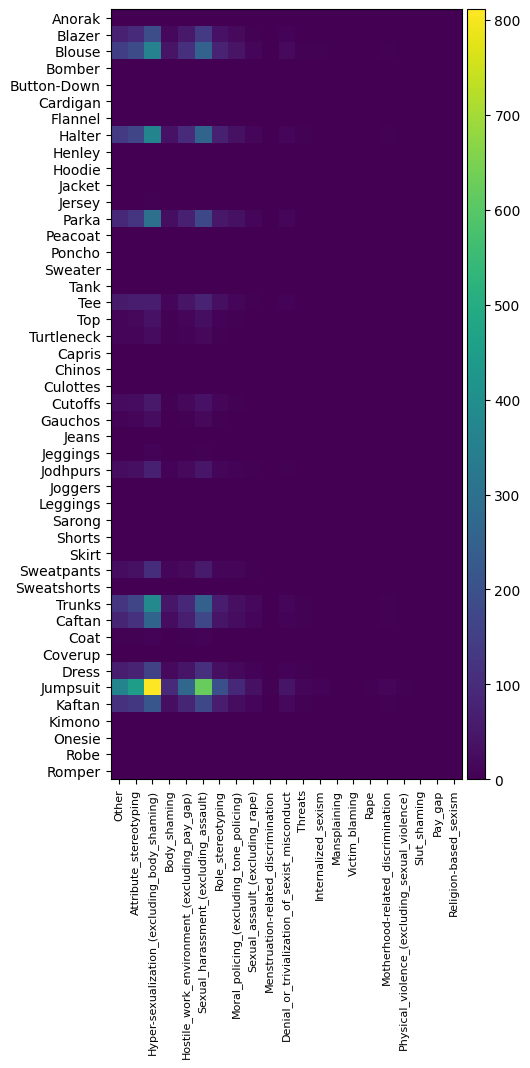

In [13]:
freq_corr_clothing = []
for clothing_label in inv_clothing_index:
    freq_corr_clothing.append(np.zeros(len(inv_comment_index)))

for index in range(0,len(Y)):
    y_vals = Y[index]
    for val_index in range(0,len(y_vals)):
        if y_vals[val_index] > 0:
            freq_corr_clothing[int(X[index][4])][val_index] += y_vals[val_index]
            freq_corr_clothing[int(X[index][5])][val_index] += y_vals[val_index]
    
plt.figure(figsize=(20, 10))
ax = plt.gca()
im = ax.imshow(freq_corr_clothing, cmap='viridis', interpolation='nearest')
plt.yticks(range(0,len(clothing_index)), list(clothing_index.keys()))
plt.xticks(range(0,len(comment_index)), [x.replace('__label__', '') for x in comment_index.keys()], rotation=90, fontsize=8)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

##### 4.9 Correlating BMI Weight Classes and Sexism categories based on frequencies

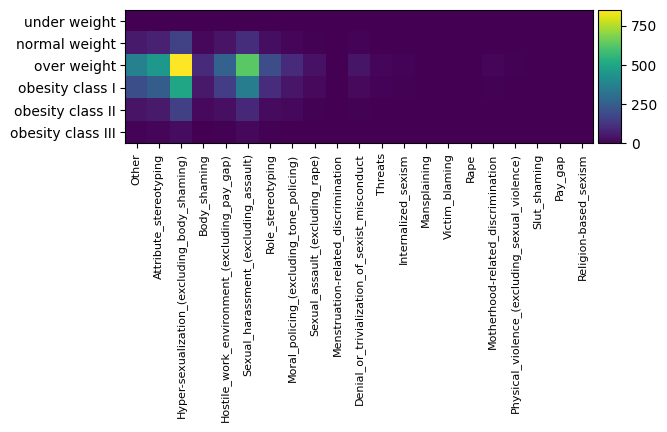

In [14]:
freq_corr_bmi = []
for bmi_label in bmi_freq.keys():
    freq_corr_bmi.append(np.zeros(len(inv_comment_index)))
    
for index in range(0,len(Y)):
    y_vals = Y[index]
    for val_index in range(0,len(y_vals)):
        if y_vals[val_index] > 0:
            if X[index][3] < 18.5:
                freq_corr_bmi[0][val_index] += y_vals[val_index]
            elif X[index][3] >= 18.5 and X[index][3] <= 24.9:
                freq_corr_bmi[1][val_index] += y_vals[val_index]
            elif X[index][3] >= 25.0 and X[index][3] <= 29.9:
                freq_corr_bmi[2][val_index] += y_vals[val_index]
            elif X[index][3] >= 30.0 and X[index][3] <= 34.9:
                freq_corr_bmi[3][val_index] += y_vals[val_index]
            elif X[index][3] >= 35.0 and X[index][3] <= 39.9:
                freq_corr_bmi[4][val_index] += y_vals[val_index]
            elif X[index][3] > 40.0:
                freq_corr_bmi[5][val_index] += y_vals[val_index]
            
ax = plt.gca()
im = ax.imshow(freq_corr_bmi, cmap='viridis', interpolation='nearest')
plt.yticks(range(0,len(bmi_freq)), list(bmi_freq.keys()))
plt.xticks(range(0,len(comment_index)), [x.replace('__label__', '') for x in comment_index.keys()], rotation=90, fontsize=8)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

##### 4.10 Correlating BMI Weight Classes and Sexism categories based on frequencies

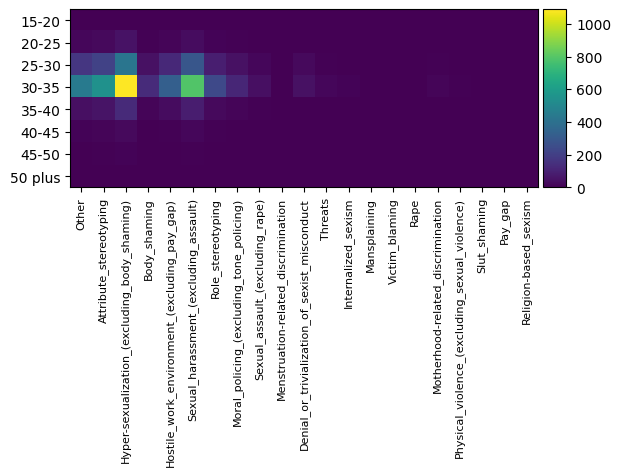

In [15]:
freq_corr_age = []
for age_label in age_freq.keys():
    freq_corr_age.append(np.zeros(len(inv_comment_index)))
    
for index in range(0,len(Y)):
    y_vals = Y[index]
    for val_index in range(0,len(y_vals)):
        if y_vals[val_index] > 0:
            if X[index][0] < 20:
                freq_corr_age[0][val_index] += y_vals[val_index]
            elif X[index][0] >= 20 and X[index][0] < 25:
                freq_corr_age[1][val_index] += y_vals[val_index]
            elif X[index][0] >= 25 and X[index][0] < 30:
                freq_corr_age[2][val_index] += y_vals[val_index]
            elif X[index][0] >= 30 and X[index][0] < 35:
                freq_corr_age[3][val_index] += y_vals[val_index]
            elif X[index][0] >= 35 and X[index][0] < 40:
                freq_corr_age[4][val_index] += y_vals[val_index]
            elif X[index][0] >= 40 and X[index][0] < 45:
                freq_corr_age[5][val_index] += y_vals[val_index]
            elif X[index][0] >= 45 and X[index][0] < 50:
                freq_corr_age[6][val_index] += y_vals[val_index]
            elif X[index][0] > 50:
                freq_corr_age[7][val_index] += y_vals[val_index]
            
ax = plt.gca()
im = ax.imshow(freq_corr_age, cmap='viridis', interpolation='nearest')
plt.yticks(range(0,len(age_freq)), list(age_freq.keys()))
plt.xticks(range(0,len(comment_index)), [x.replace('__label__', '') for x in comment_index.keys()], rotation=90, fontsize=8)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

#### 5. Test Train Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [17]:
X_test.shape

(1223, 6)

#### 6. Running Different Models

In [18]:
rand_forest = RandomForestRegressor(n_estimators=50, random_state=0)
model = rand_forest
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))
pickle.dump(model, open("../Models/Final_Classifier_Models/rand_forest.sav", 'wb'))

0.021941544146657714
0.002260814187292999


In [19]:
dec_tree = DecisionTreeRegressor(max_depth=5, random_state=0)
model = dec_tree
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))
pickle.dump(model, open("../Models/Final_Classifier_Models/dec_tree.sav", 'wb'))

0.02183907599065118
0.0021975943501753017


In [20]:
knn = KNeighborsRegressor(n_neighbors=5)
model = knn
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))
pickle.dump(model, open("../Models/Final_Classifier_Models/knn.sav", 'wb'))

0.02366049555163769
0.0025729882120782747


In [21]:
linear_reg = LinearRegression()
model = linear_reg
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))
pickle.dump(model, open("../Models/Final_Classifier_Models/lin_reg.sav", 'wb'))

0.0222761636983436
0.0022834499943229177


In [22]:
mlp_reg = MLPRegressor(random_state=0, max_iter=600, solver='sgd', learning_rate='adaptive', batch_size=200)
model = MultiOutputRegressor(mlp_reg)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))
pickle.dump(model, open("../Models/Final_Classifier_Models/mlp.sav", 'wb'))

0.023053643076327558
0.0024076525138593103


In [23]:
grad_boost = GradientBoostingRegressor(random_state=0)
model = MultiOutputRegressor(grad_boost)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))
pickle.dump(model, open("../Models/Final_Classifier_Models/grad_boost.sav", 'wb'))

0.021259764150587564
0.0020857398619669393
